<a href="https://colab.research.google.com/github/Xirailuyo/PTLearning/blob/master/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Steps:
1. Load and Normalize Data
2. Define CNN
3. Define Loss and Optimizer
4. Train Network on Training
5. Test Network on Test

## Load and Normalize Data

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

In [0]:
# transform datasets to tensors normalized to [-1,1]

# Combines ToTensor and Normalize transform operations 
transform = transforms.Compose(
  [transforms.ToTensor(),
  transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

# import data
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                       download=True, transform=transform)
# create dataloader based on trainset tensors
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                         shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                      download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                        shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


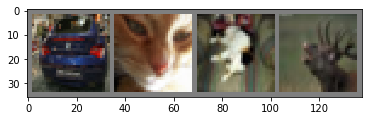

  car   cat   cat  deer


In [0]:
# display training images
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  # reduce resolution by 2 and add border?
  img = img/2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()
  
# select random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## Define CNN

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  # define characteristics of the Net Class
  def __init__(self):
    # allows for multiple inheritances
    super(Net, self).__init__()
    # convolution layer
    self.conv1 = nn.Conv2d(3,6,5)
    # pooling layer
    self.pool = nn.MaxPool2d(2,2)
    # 2nd convolution layer
    self.conv2 = nn.Conv2d(6,16,5)
    # 3 linear layers reducing and abstracting the data
    self.fc1 = nn.Linear(16*5*5,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self,x):
    # use relu to determine actions of convolution layers 
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1,16*5*5)
    # relu through linear layers (fc3 provides output)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    return x

net = Net()

## Define Loss and Optimizer

In [0]:
# Cross-Entropy loss and SGD with momentum

# optimization package
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=.001, momentum=.9)

## Train Network on Training

In [0]:
# loop over data iterator and feed inputs, then optimize

# two passes over the dataset
for epoch in range(2):

  running_loss = .0
  for i, data in enumerate(trainloader, 0):
    # get inputs; data is a list of [inputs, labels]
    inputs, labels = data

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.item()
    if i % 2000 == 1999: # print every 2000 mini-batches
      print('[%d, %5d] loss: %.3f' %
            (epoch+1, i+1, running_loss/2000))
      running_loss = .0

print('Finished Training')

[1,  2000] loss: 2.707
[1,  4000] loss: 2.117
[1,  6000] loss: 1.896
[1,  8000] loss: 1.541
[1, 10000] loss: 1.496
[1, 12000] loss: 1.417
[2,  2000] loss: 1.349
[2,  4000] loss: 1.322
[2,  6000] loss: 1.305
[2,  8000] loss: 1.280
[2, 10000] loss: 1.259
[2, 12000] loss: 1.227
Finished Training


## Test Network on Test

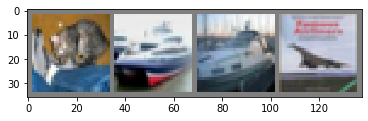

GroundTruth:    cat  ship  ship plane


In [0]:
# predictions - actual

# a few sample images
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s'%classes[labels[j]] for j in range(4)))

In [0]:
# How to load a dataset without rerunning the train
# net = Net()
# net.load_state_dict(torch.load(PATH))

In [0]:
# counters
correct = 0
total = 0
# using CPU
with torch.no_grad():
  for data in testloader: # go through entire test dataset
    images, labels = data # divide data into two components
    outputs = net(images) # put images into net
    _, predicted = torch.max(outputs.data, 1) # take max (classification)
    total += labels.size(0) # number of labels
    correct += (predicted == labels).sum().item() # number correct

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100*correct/total
))

Accuracy of the network on the 10000 test images: 56 %


In [0]:
# which classes performed well?
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    c = (predicted == labels).squeeze() # dimensional reduction of unnecessary dimensions
    for i in range(4):
      label = labels[i]
      class_correct[label] += c[i].item()
      class_total[label] += 1

for i in range(10):
  print('Accuracy of %5s : %2d %%' % (
      classes[i], 100*class_correct[i]/class_total[i]
  ))

Accuracy of plane : 58 %
Accuracy of   car : 52 %
Accuracy of  bird : 20 %
Accuracy of   cat : 29 %
Accuracy of  deer : 54 %
Accuracy of   dog : 50 %
Accuracy of  frog : 80 %
Accuracy of horse : 66 %
Accuracy of  ship : 82 %
Accuracy of truck : 69 %
